**数据集简介**
<br>
主要包括3类指标:
<br>
<ul>
    <li>汽车的各种特性
    <li>保险风险评级:(-3,-2,-1,0,1,2,3)
    <li>每辆保险车辆年平均相对损失支付.
</ul>

**类别属性**
<ul>
    <li>make:汽车的商标(爽迪,宝马。。。)
    <li>fuel-type:汽油还是天然气
    <li>aspiration:涡轮
    <li>num- of-doors:两门还是四门
    <li>body-style:硬顶车、轿车、菰背车、散篷车
    <li>drive- wheels:驱动轮
    <li>engine-location:发动机位置
    <li>engine-type:发动机类型
    <li>num- of-cylinders:几个气缸
    <li>fuel- system:燃油系统
</ul>

**连续指标**
<ul>
<li>bore: continuous from 2.54 to 3.94.
<li>stroke: continuous from 2.07 to 4.17.
<li>compression-ratio: continuous from 7 to 23.
<li>horsepower: continuous from 48 to 288.
<li>peak-rpm: continuous from 4150 to 6600.
<li>city-mpg: continuous from 13 to 49.
<li>highway-mpg: continuous from 16 to 54.
<li>price: continuous from 5118 to 45400.
</ul>

In [3]:
# loading packages
import numpy as np
import pandas as pd
from pandas import datetime

#data visualization and missing values
import matplotlib.pyplot as plt
import seaborn as sns #基于Matplotlib，更高级的
import missingno as msno  #提供了一个灵活且易于使用的缺失数据可视化和实用程序的小工具集
%matplotlib inline

#stats
from statsmodels.distributions.empirical_distribution import ECDF #对许多不同统计模型估计的类和函数，可以进行统计测试和统计数据的探索。
from sklearn.metrics import mean_squared_error,r2_score #常用的机器学习方法，包括回归(Regression)、降维(Dimensionality Reduction)、分类(Classfication)、聚类(Clustering)等方法

#mechine learning 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso,LassoCV
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestRegressor
seed = 123  # 随机种子，使随机策略结果一致，不指定则每次随机结果不一样

#import data
data = pd.read_csv('auto_data.csv', na_values='?')
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compress-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg',
       'price', 'output'],
      dtype='object')

In [4]:
data.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compress-ratio       float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
output                object
dtype: object

In [6]:
print('In total:', data.shape)  # 205条数据，26个特征，NaN表示为缺失值
data.head(5)

In total: (205, 27)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compress-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,output
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,no
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,no
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,no
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,no
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,no


In [7]:
data.describe()  #查看数据描述，count统计、mean均值、std标准差、min最小值、50%中位数、max最大值

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compress-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,128.965854,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.324878,3.253366,10.142537,106.048780,5131.463415,25.219512,30.751220,13293.331707
std,1.245307,39.421600,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273049,0.313937,3.972040,43.468803,480.933330,6.542142,6.886443,8115.709527
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5000.000000
25%,0.000000,95.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,158.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


**缺失值处理**

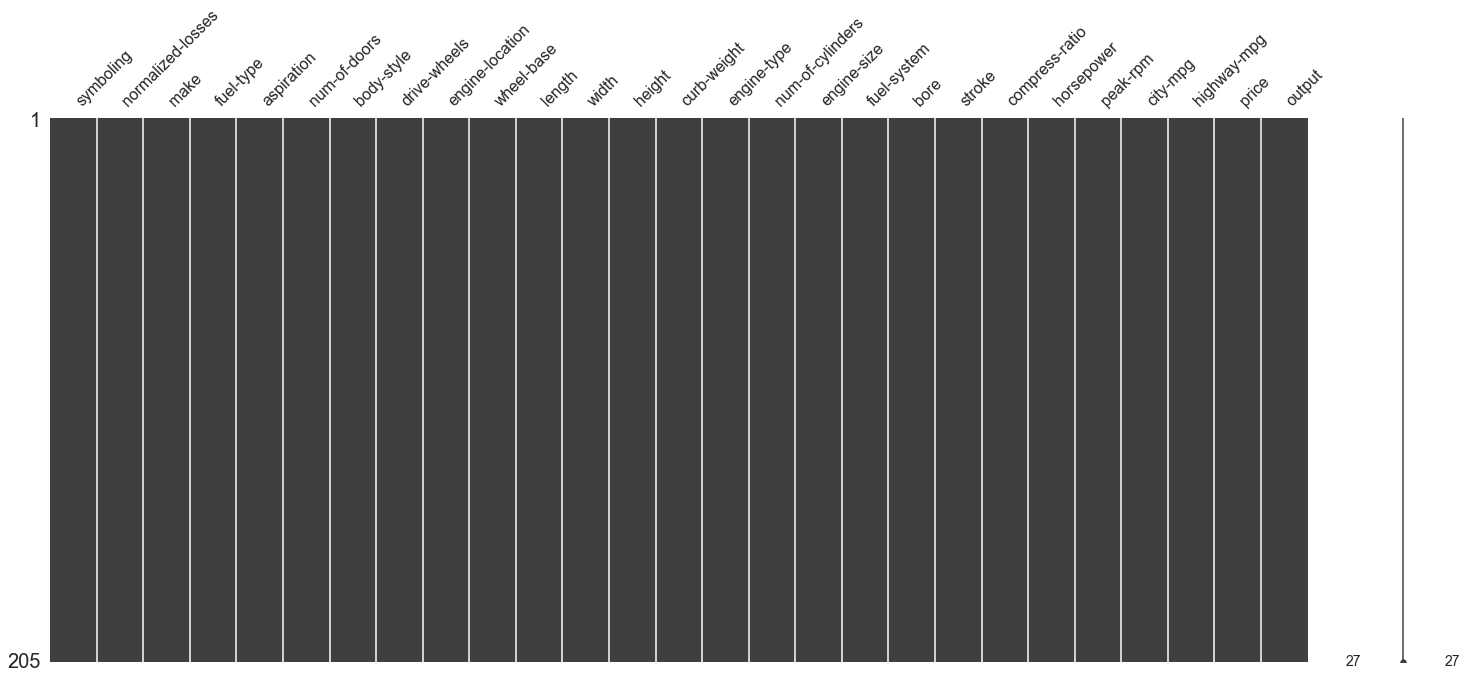

In [8]:
sns.set(style='ticks')  #指定风格
msno.matrix(data)  #查看缺少情况

这里是没缺失值的，你可以手动删掉一些数据造成缺少的情况

In [10]:
#缺失值填充（也可以删掉，但是我们数据不多删掉就更少了）
data[pd.isnull(data['normalized-losses'])].head()  #查看某列缺失的情况，这里没缺少，我们假设其缺失

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compress-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,output


(array([13., 24., 36., 26., 16., 17., 24., 25.,  7., 12.,  0.,  0.,  1.,
         4.]), array([ 65.        ,  78.64285714,  92.28571429, 105.92857143,
        119.57142857, 133.21428571, 146.85714286, 160.5       ,
        174.14285714, 187.78571429, 201.42857143, 215.07142857,
        228.71428571, 242.35714286, 256.        ]), <a list of 14 Patch objects>)

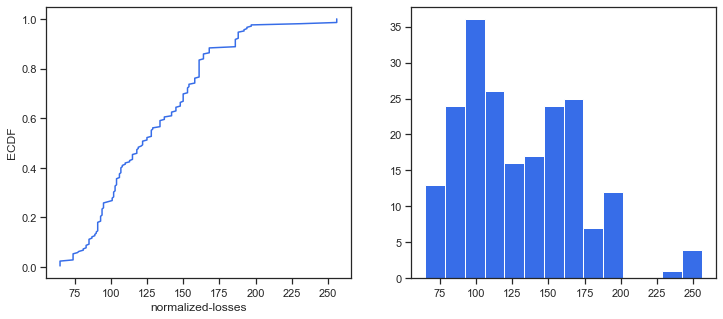

In [16]:
plt.figure(figsize=(12,5))
c = '#376DE8'  # 指定颜色

#ECDF，画出占比
plt.subplot(121)  # 分两边，画在左边
cdf = ECDF(data['normalized-losses'])
plt.plot(cdf.x, cdf.y,label='statmodels',color=c)
plt.xlabel('normalized-losses')
plt.ylabel('ECDF')

#overall distribution，画出占比
plt.subplot(122)  # 分两边，画在右边
plt.hist(data['normalized-losses'].dropna(),
        bins=int(np.sqrt(len(data['normalized-losses']))),
        color = c)

可以发现**80%的 normalized losses是低于200**并且绝大多数低于125。
<br>
<br>
一个基本的想法就是用中位数来进行填充,但是我们得来想一想,这个特征(保险损失值)跟哪些因素可能有关呢？应该是保险的情况吧,所以我们可以分组来进行填充这样会更精确一些。
<br><br>
首先来看一下对于不同保险情况的统计指标：

In [17]:
data.groupby('symboling')['normalized-losses'].describe()  #查看风险等级

,count,mean,std,min,25%,50%,75%,max
symboling,,,,,,,,
-2,3.0,103.000000,0.000000,103.0,103.0,103.0,103.00,103.0
-1,22.0,86.136364,17.715464,65.0,74.0,91.5,95.00,137.0
0,67.0,128.776119,44.511429,77.0,91.0,110.0,161.00,256.0
1,54.0,132.037037,29.599823,74.0,108.5,128.0,154.00,231.0
2,32.0,128.000000,31.285367,83.0,101.5,134.0,158.75,192.0
3,27.0,162.222222,34.033166,74.0,150.0,153.0,186.00,256.0


这样，我们可以对应不同的组，去填充对应的均值
<br><br>如-2对应着103，-1对应86

In [19]:
data = data.dropna(subset=['price','bore','stroke'])  #对缺失值少量的可以之间删除
#对于大量缺失情况的，补相关特征不同组对应的均值
data['normalized-losses'] = data.groupby('symboling')['normalized-losses'].transform(lambda x:x.fillna(x.mean()))

print('In total:', data.shape)  # 205条数据，26个特征，NaN表示为缺失值
data.head(5)

In total: (205, 27)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compress-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,output
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,no
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,no
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,no
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,no
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,no
